In [31]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data preparation and processing or data manipulation
import seaborn as sns
import matplotlib.pyplot as plt # plotting
%matplotlib inline

import graphviz # visualization of the leaf nodes

# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Control Display
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc= {'axes.facecolor': 'gray'})

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load / dataset 
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [33]:
"""
cp = chest pain
trestbps = resting blood pressure
chol = cholesterol
fbs = fasting blood sugar
restecg = resting electrocardiograghy
exang =  exercise induced agina
oldpeak = ST depression induced
slope  = the slope of the peak exercise
ca = number of major vessel
thal = normal, fixed defect, reversible defect
target = have diseases or not
"""

'\ncp = chest pain\ntrestbps = resting blood pressure\nchol = cholesterol\nfbs = fasting blood sugar\nrestecg = resting electrocardiograghy\nexang =  exercise induced agina\noldpeak = ST depression induced\nslope  = the slope of the peak exercise\nca = number of major vessel\nthal = normal, fixed defect, reversible defect\ntarget = have diseases or not\n'

In [34]:
# Logistic regression
# Predict one or more possible outcomes (usually represented by 1 or 0)
# Column target
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [35]:
# Show mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


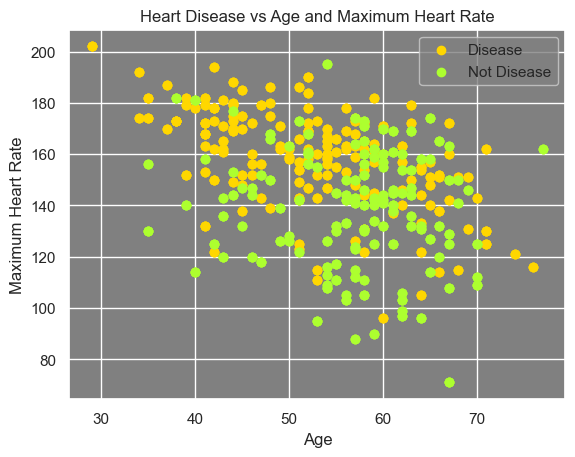

In [36]:
# Create a scatter plot for Heart Disease vs Age and Maximum Age Heart Rate
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0], c='#ADFF2F', label='Not Disease')

# Add a legend 
plt.legend()

# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Set the title of the plot
plt.title('Heart Disease vs Age and Maximum Heart Rate')

# Show the plot
plt.show()

In [37]:
# Create a LogisticRegression
# Help to solve problems with classification
# Create the independent variables and dependent variables
y = df.target.values
x_data = df.drop(['target'], axis=1)

In [38]:
# Normalize the data X = (X-Xmin)/ (Xmax-Xmin)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [39]:
# Split the data 80% training # 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=0) 

In [40]:
# Tranpose Matrix
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [41]:
# Determine the accuracy using the logistic regression
# Getting the test Accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)

acc = lr.score(x_test.T, y_test.T) * 100

accuracies['LogisticRegression'] = acc

# Output the results
print('Test accuracy {:.2f}%'.format(acc))

Test accuracy 72.68%


In [42]:
# Import KNN classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

# Output the results
print('{} NN Score {:.2f}%'.format(2, knn.score(x_test.T, y_test.T)* 100))

2 NN Score 95.12%


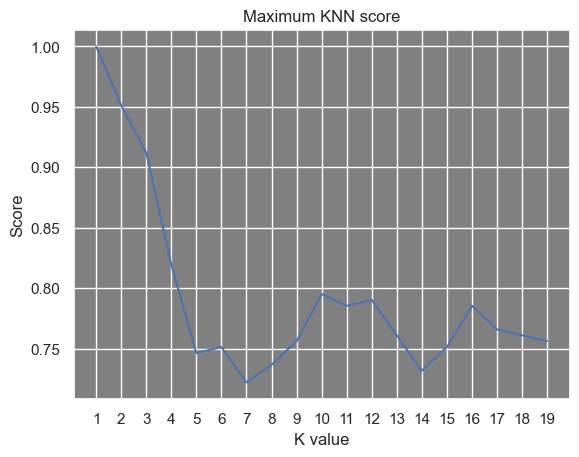

Maximum KNN score is 100.00%


In [43]:
# Get maximum KNN score for the model
score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i) # Get n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# Show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.ylabel('Score')
plt.xlabel('K value')
plt.title('Maximum KNN score')
plt.show()

# Get maximum KNN score for the model in percentage 
acc = max(score_list)* 100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}%'.format(acc))

In [44]:
# Get Test accuracy using the Support Vector Machine (SVM)  algorithm
from sklearn.svm import SVC

svm = SVC(random_state= 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T, y_test.T)*100
accuracies['SVM'] = acc

print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 74.63%


In [45]:
# Get accuracy using the Naive Bayes Algorithm
from sklearn.naive_bayes import  GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T)*100
accuracies['NaiveBayes'] = acc

print('Accuracy of NaiveBayes: {:.2f}%'.format(acc))


Accuracy of NaiveBayes: 85.37%


In [46]:
# Get accuracy of Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc

print('Accuracy of Decision Tree Model: {:.2f}%'.format(acc))

Accuracy of Decision Tree Model: 100.00%


In [47]:
# Random Forest Classification Algorithm accuracy 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T)*100
accuracies['Random Forest'] = acc

print('Random Forest Classification Algorithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Classification Algorithm Accuracy Score: 100.00%


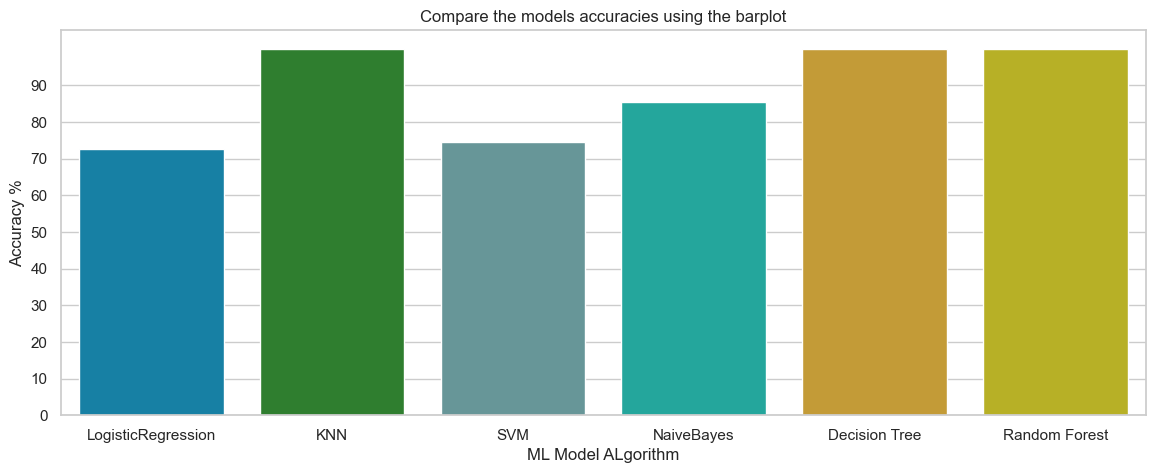

In [48]:
# Compare the models accuracies using the barplot from sns
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Accuracy %')
plt.xlabel('ML Model ALgorithm')
plt.title('Compare the models accuracies using the barplot')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [49]:
# ML confusion matrix
# Evalutes the performance of a classification model


In [50]:
# Get confusion matrices look at the imbalance dataset
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)

In [51]:
# Import module for  cofusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

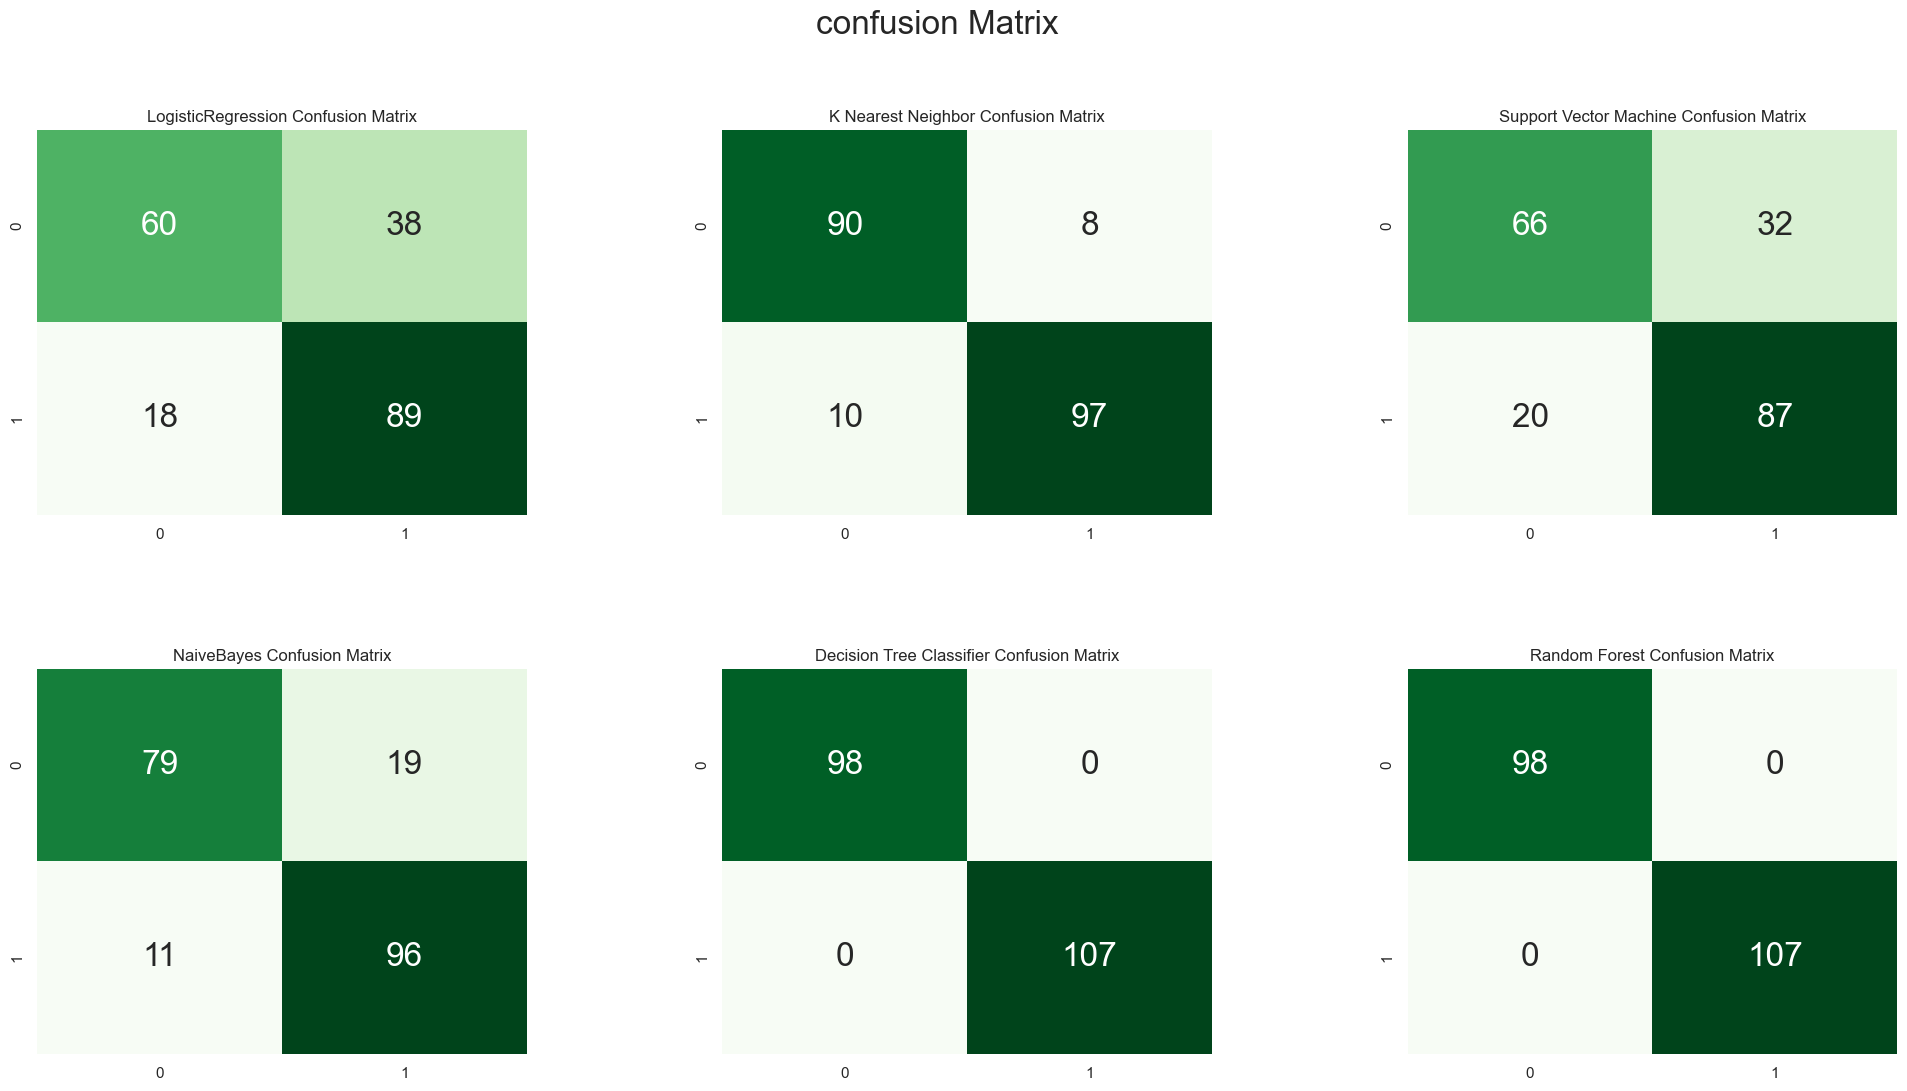

In [52]:
# Ploting for heatmap using confusion matrices
plt.figure(figsize=(24,12))

plt.suptitle('confusion Matrix', fontsize=24)
plt.subplots_adjust(wspace= 0.4, hspace=0.4)

# Heatmap for Logistic Regression Confusion Matrix
plt.subplot(2,3,1)
plt.title("LogisticRegression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size":24})

# Heatmap for K Nearest Neighbor Confusion Matrix
plt.subplot(2,3,2)
plt.title("K Nearest Neighbor Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size":24})

# Heatmap for Support Vector Machine Confusion Matrix
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size":24})

# Heatmap for NaiveBayes Confusion Matrix
plt.subplot(2,3,4)
plt.title("NaiveBayes Confusion Matrix")
sns.heatmap(cm_nb, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size":24})

# Heatmap for Decision Tree Classifier Confusion Matrix
plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size":24})

# Heatmap for Random Forest Confusion Matrix
plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap="Greens", fmt="d", cbar=False, annot_kws={"size":24})

plt.show()